# 다양한 그래프 그리기

## 수정 종가와 거래량 한번에 그리기

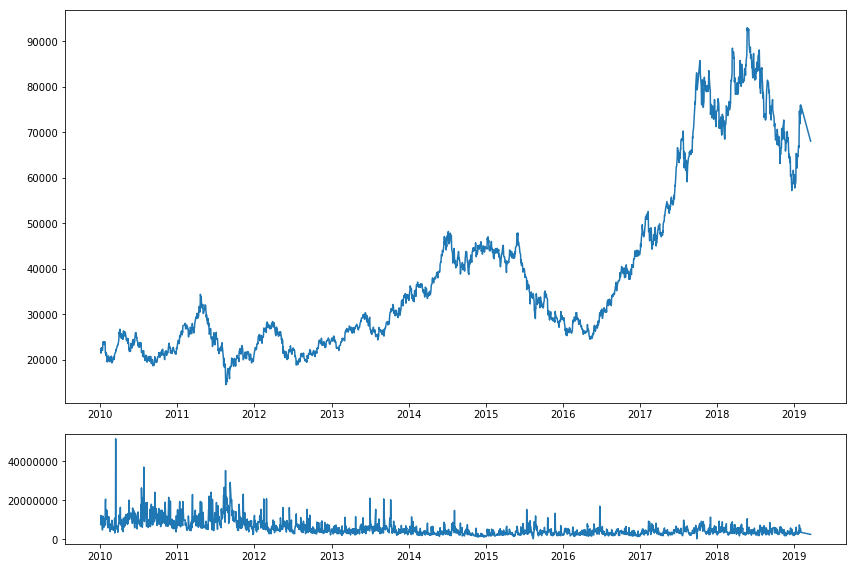

In [12]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web

sk_hynix = web.DataReader("000660.KS", "yahoo")

fig = plt.figure(figsize=(12,8))

top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

top_axes.plot(sk_hynix.index, sk_hynix['Adj Close'], label='Adjusted Close')
bottom_axes.plot(sk_hynix.index, sk_hynix['Volume'])

plt.tight_layout()
plt.show()

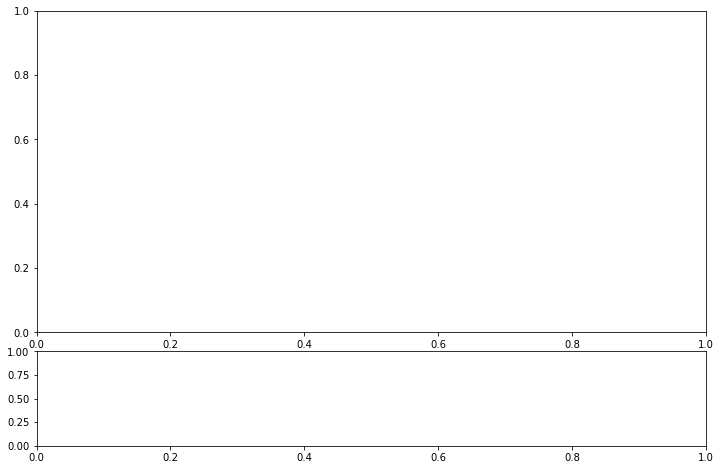

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

plt.show()

## 캔들 스틱 차트 그리기

In [21]:
import matplotlib.pyplot as plt
import datetime

start = datetime.datetime(2016, 3, 1)
end = datetime.datetime(2016, 3, 31)

skhynix = web.DataReader("000660.KS", "yahoo", start, end)
skhynix = skhynix[skhynix['Volume'] > 0]
skhynix.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-02,31300.0,30650.0,31050.0,30950.0,3567312.0,29378.457031
2016-03-03,32000.0,31100.0,31550.0,31950.0,3898363.0,30327.679688
2016-03-04,32100.0,31550.0,31800.0,31900.0,1913316.0,30280.218750
2016-03-07,32250.0,31500.0,32150.0,31900.0,3487206.0,30280.218750
2016-03-08,31500.0,30300.0,31200.0,30500.0,4616147.0,28951.304688


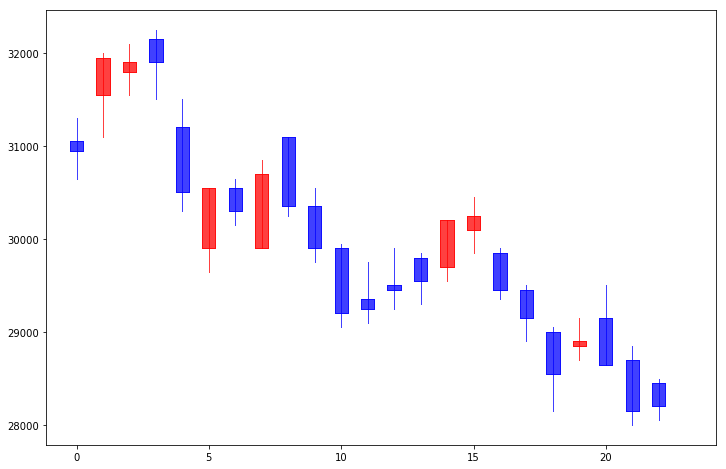

In [22]:
import mpl_finance
import matplotlib.finance as matfin

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

mpl_finance.candlestick2_ohlc(ax, skhynix['Open'], skhynix['High'], 
                             skhynix['Low'], skhynix['Close'], 
                             width=0.5, colorup='r', colordown='b')
plt.show()

위 봉차트에서 아쉬운점은, x축에 날짜가 아니라 0부터 시작하는 정수가 출력되고 있다. 따라서 각 봉에 해당하는 거래일 정보는 얻을 수 없다.

In [23]:
skhynix.index

DatetimeIndex(['2016-03-02', '2016-03-03', '2016-03-04', '2016-03-07',
               '2016-03-08', '2016-03-09', '2016-03-10', '2016-03-11',
               '2016-03-14', '2016-03-15', '2016-03-16', '2016-03-17',
               '2016-03-18', '2016-03-21', '2016-03-22', '2016-03-23',
               '2016-03-24', '2016-03-25', '2016-03-28', '2016-03-29',
               '2016-03-30', '2016-03-31', '2016-04-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [24]:
skhynix.index[0]

Timestamp('2016-03-02 00:00:00')

In [25]:
type(skhynix.index[0])

pandas.tslib.Timestamp

In [26]:
skhynix.index[0].strftime('%d')

'02'

In [27]:
skhynix.index[0].strftime('%y-%m-%d')

'16-03-02'

In [28]:
# 공간이 부족하기 때문에 일자만 추출한다
name_list = []
for day in skhynix.index:
    name_list.append(day.strftime('%d'))
name_list

['02',
 '03',
 '04',
 '07',
 '08',
 '09',
 '10',
 '11',
 '14',
 '15',
 '16',
 '17',
 '18',
 '21',
 '22',
 '23',
 '24',
 '25',
 '28',
 '29',
 '30',
 '31',
 '01']

In [30]:
"""
x축, y축에 표시되는 값을 ticker라고 부른다. 
ticker를 설정하려면 ticker의 위치와 각 위치에서 출력될 값이 필요하다.
출력될 값은 name_list이므로 위치값만 생성하면 된다.
"""
day_list = range(len(skhynix))
day_list

range(0, 23)

In [31]:
# ticker의 위치와 출력값 출력 위해
import matplotlib.ticker as ticker
# set_major_locator(위치설정)
# set_major_formatter(출력값 설정)
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedLocator(name_list))

### x축의 값을 날짜값으로 나타낸 코드

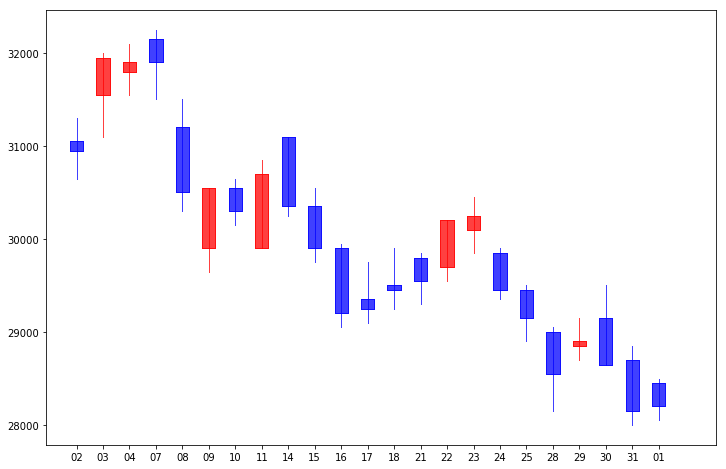

In [32]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance
import matplotlib.ticker as ticker

start = datetime.datetime(2016, 3, 1)
end = datetime.datetime(2016, 3, 31)
skhynix = web.DataReader("000660.KS", "yahoo", start, end)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

day_list = range(len(skhynix))
name_list = []
for day in skhynix.index:
    name_list.append(day.strftime('%d'))

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

mpl_finance.candlestick2_ohlc(ax, skhynix['Open'], skhynix['High'], skhynix['Low'], skhynix['Close'], width=0.5, colorup='r', colordown='b')
plt.show()

### x축의 값을 월요일마다 "연도-월-일" 포맷으로 출력

In [34]:
# Timestamp 객체에서 'dayofweek'라는 요일 속성 제공
day_list= []
name_list = []

for i, day in enumerate(skhynix.index):
    if day.dayofweek == 0:
        day_list.append(i)
        name_list.append(day.strftime('%y-%m-%d')+'(Mon)')

In [35]:
day_list

[3, 8, 13, 18]

In [36]:
name_list

['16-03-07(Mon)', '16-03-14(Mon)', '16-03-21(Mon)', '16-03-28(Mon)']

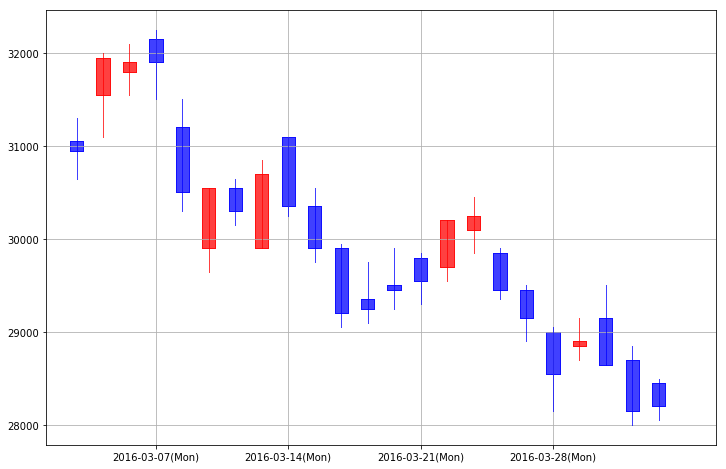

In [38]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance
import matplotlib.ticker as ticker

start = datetime.datetime(2016, 3, 1)
end = datetime.datetime(2016, 3, 31)
skhynix = web.DataReader("000660.KS", "yahoo", start, end)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

day_list = []
name_list = []
for i, day in enumerate(skhynix.index):
    if day.dayofweek == 0:
        day_list.append(i)
        name_list.append(day.strftime('%Y-%m-%d') + '(Mon)')

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

mpl_finance.candlestick2_ohlc(ax, skhynix['Open'], skhynix['High'], skhynix['Low'], skhynix['Close'], width=0.5, colorup='r', colordown='b')
plt.grid()
plt.show()

## bar 차트 그리기

In [39]:
import matplotlib.pyplot as plt
import numpy as np
# 그래프를 그릴 떄 한글 폰트 설정시 사용
from matplotlib import font_manager, rc

In [40]:
# 기본적으로 한글 폰트로 설정되지 않기 때문에 한글 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/malgun.ttf'

In [41]:
# bar 그래프를 그리기 위한 데이터
industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]

In [42]:
# igure 객체와 AxesSubplot 객체
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

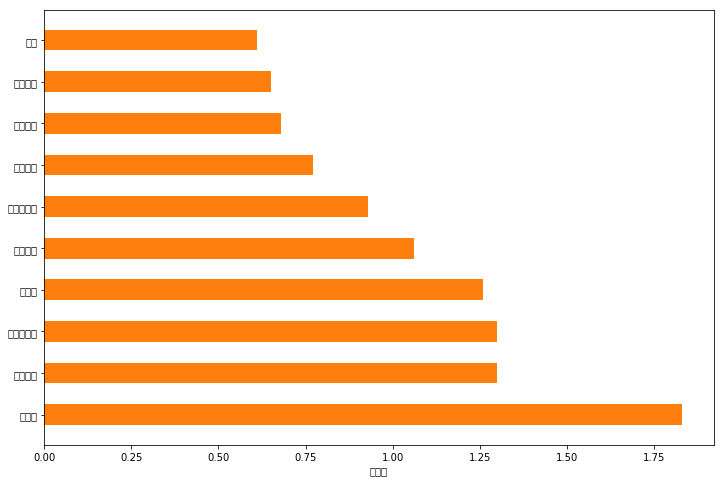

In [44]:
# 수평 방향의 bar 차트는 matplotlib.pyplot 모듈의 barh 함수 이용
# barh(bar가 그려질 위치, bar의 수치, 정렬, 높이)
# y축에 ticker를 표시하기 위해 pyplot의 yticks 함수 사용
ypos = np.arange(10)
rects = plt.barh(ypos, fluctuations, align='center', height=0.5)
plt.yticks(ypos, industry)
plt.xlabel('등락률')
plt.show()

In [45]:
# bar 차트에 수치값이 출력되게 하기 위해
from matplotlib import style
style.use('ggplot')

In [46]:
# text(x축 위치, text가 출력될 y축 위치, 실제로 표시될 값)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(fluctuations[i]) + '%', ha='right', va='center')

### 수평방향 전체 코드

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ypos = np.arange(10)
rects = plt.barh(ypos, fluctuations, align='center', height=0.5)
plt.yticks(ypos, industry)

for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(fluctuations[i]) + '%', ha='right', va='center')

plt.xlabel('등락률')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/malgun.ttf'

### 수직 방향 bar 차트
차이점: barh 함수대신 bar 함수 사용

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

xpos = np.arange(10)
rects = plt.bar(pos, fluctuations, align='center', width=0.5)
plt.xticks(xpos, industry)

for i, rect in enumerate(rects):
    ax.text(rect.get_x() + rect.get_width() / 2.0, 0.95 * rect.get_height(), str(fluctuations[i]) + '%', ha='center')

plt.ylabel('등락률')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/malgun.ttf'

## Pie 차트 그리기

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

labels = ['삼성전자', 'SK하이닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10]

plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/malgun.ttf'

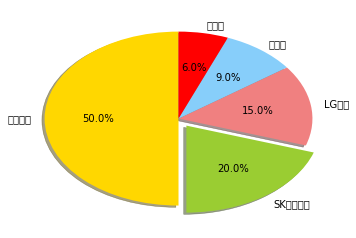

In [57]:
# 색, 라벨, 비율, 확대 값을 리스트로 전달
# autopct - 각 범주가 데이터에서 차지하는 비율 출력
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
labels = ['삼성전자', 'SK하이닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 15, 9, 6]
explode = (0.0, 0.1, 0.0, 0.0, 0.0)

plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

### Pie 차트 전체 코드

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
labels = ['삼성전자', 'SK하이닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10]
explode = (0.0, 0.1, 0.0, 0.0, 0.0)

plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/malgun.ttf'